In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv(r'C:\Users\Dell\Downloads\Ai_Project\Ai_project2\Obesity-risk-pred\datasets\clean\processedtrain.csv')
df_test=pd.read_csv(r'C:\Users\Dell\Downloads\Ai_Project\Ai_project2\Obesity-risk-pred\datasets\clean\processedtest.csv')
df_train.head(11)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.085106,1.82,0.769403,1,1,3.000000,3.0,1,0,2.71,0,2.00,0.814,1,0.753684,Obesity_Type_III
1,0,0.382979,1.84,0.442239,1,1,2.330000,2.0,1,0,2.56,0,1.33,0.481,1,0.212105,Overweight_Level_II
2,0,0.212766,1.76,0.584552,1,1,1.540000,3.0,1,0,2.00,0,1.63,0.631,1,0.753684,Obesity_Type_II
3,1,0.255319,1.62,0.534925,1,1,3.000000,3.0,1,0,2.69,0,0.00,0.425,1,0.753684,Obesity_Type_III
4,0,0.382979,1.78,0.613433,1,1,2.760000,3.0,1,0,2.16,0,0.43,0.716,1,0.212105,Obesity_Type_II
5,0,0.404255,1.85,0.343284,0,1,2.417272,3.0,2,0,2.00,0,1.00,0.000,1,0.212105,Normal_Weight
6,1,0.382979,1.67,0.380597,1,1,2.417272,1.0,1,0,2.00,0,2.00,0.000,1,0.212105,Obesity_Type_I
7,1,0.276596,1.55,0.178209,0,1,2.417272,2.0,1,0,1.00,0,0.79,0.395,1,0.753684,Overweight_Level_I
8,1,0.106383,1.68,0.659925,1,1,2.417272,3.0,1,0,1.44,0,1.43,0.662,1,0.753684,Obesity_Type_III
9,1,0.255319,1.61,0.507537,1,1,3.000000,3.0,1,0,2.68,0,0.00,0.509,1,0.753684,Obesity_Type_III


In [3]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df_train['NObeyesdad']=encoder.fit_transform(df_train['NObeyesdad'])
df_train['NObeyesdad'].value_counts()

df_test['NObeyesdad']=encoder.fit_transform(df_test['NObeyesdad'])
df_test.head(11)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.475,1.71,0.371471,1,1,2.88,3.0,1,0,3.00,0,2.00,0.832,0,0.255924,6
1,0,0.075,1.75,0.497972,1,1,2.00,3.0,2,0,2.00,0,2.00,0.000,0,0.701422,2
2,0,0.075,1.85,0.208213,1,0,2.00,3.0,1,0,3.00,0,2.00,1.000,1,0.009479,1
3,0,0.375,1.78,0.668847,1,1,2.50,3.0,1,0,2.04,0,0.84,0.490,1,0.255924,3
4,0,0.225,1.80,0.670999,1,1,2.20,3.0,1,0,2.51,0,1.66,0.128,1,0.701422,3
5,1,0.225,1.51,0.197616,1,0,2.00,1.0,1,0,1.85,0,0.55,0.236,0,0.701422,6
6,1,0.150,1.60,0.219803,1,1,2.11,3.0,1,0,2.75,0,1.91,0.000,1,0.701422,5
7,0,0.025,1.75,0.249607,1,0,2.00,3.0,1,0,1.00,0,3.00,2.000,1,0.023697,1
8,0,0.225,1.60,0.506582,1,1,3.00,1.0,1,0,1.27,0,0.07,1.552,0,0.701422,3
9,1,0.250,1.63,0.542926,1,1,3.00,3.0,1,0,1.48,0,0.10,0.663,1,0.701422,4


<Axes: >

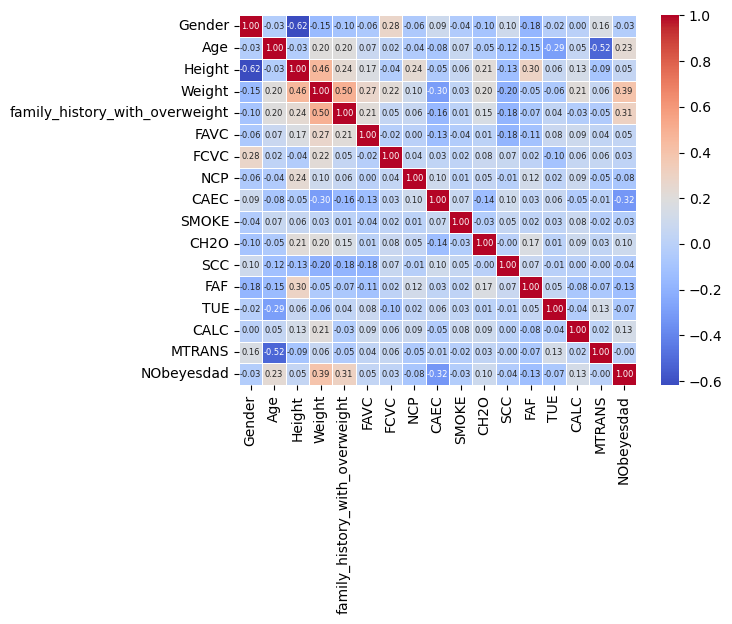

In [4]:
corr_matrix = df_train.corr()

sns.heatmap(corr_matrix,
    annot=True,            
    annot_kws={'size': 6}, 
    fmt='.2f',             
    cmap='coolwarm',      
    linewidths=0.5,        
    )

In [5]:
dataset=['Weight','Height','Age','FCVC','FAVC','TUE']
X_train = df_train[dataset]
y_train = df_train['NObeyesdad']

X_test = df_test[dataset]
y_test = df_test['NObeyesdad']


In [6]:
model = RandomForestClassifier(
    n_estimators=50, #when 30 train 89 and test 81
    max_depth=6,
    min_samples_leaf=3,
    min_samples_split=4,
    max_features='sqrt',
    random_state=42
) #n_estimators=20 num of decision tree
model.fit(X_train, y_train) #the model is train here

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=50, random_state=42)

In [7]:
y_pred = model.predict(X_test) #predict on test data
y_train_pred = model.predict(X_train)
train_acc= accuracy_score(y_train,y_train_pred)
print(f"train Accuracy: {train_acc:.2f}")

train Accuracy: 0.91


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8341232227488151

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.82      0.72      0.77        32
           2       0.68      0.90      0.78        29
           3       0.90      0.92      0.91        38
           4       0.93      1.00      0.97        28
           5       0.76      0.73      0.75        26
           6       0.85      0.68      0.75        34

    accuracy                           0.83       211
   macro avg       0.84      0.84      0.83       211
weighted avg       0.84      0.83      0.83       211

